In [149]:
%load_ext autoreload
%autoreload 2
import os
import sys
from pathlib import Path
import networkx as nx
import pandas as pd
import numpy as np
sys.path.insert(0, Path.cwd().absolute())

BASE_DIR = (Path.cwd()).parent

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
from network_analysis.flow_assignment import FlowAssignment
from geoprocessing.faf_zone_network import FafZoneNetwork, link_weights
from network_analysis.mc_flow_assignment import sample_flows
import geopandas as gpd

In [151]:
MODE = 'compare' # normal, simple, monte_carlo, compare, sensitivity

SIMPLE_NET = False
MONTE_CARLO = False
if MODE == 'simple':
  SIMPLE_NET = (421, 423, 341, 342 )
if MODE == 'monte_carlo':
  MONTE_CARLO = True

ITER_N = 10000
NORMAL_DIST = True

COLUMN = 'thousand tons in 2020'
COMPARE_COLUMN = 'thousand tons in 2018'

SENSITIVITY_MODE = 'multiplicative' # additive, multiplicative
SENSITIVITY_MODIFIER = 2

In [152]:
naRailNodesDf = gpd.read_file( BASE_DIR / "inputs/NTAD_North_American_Rail_Network_Nodes")
naRailLinesDf = gpd.read_file( BASE_DIR / "inputs/NTAD_North_American_Rail_Network_Lines")
fafZonesDf = gpd.read_file( BASE_DIR / "inputs/2017_CFS_Metro_Areas_with_FAF").to_crs(4326)
fzn = FafZoneNetwork(naRailNodesDf, naRailLinesDf, fafZonesDf).setInputDfColType()
if SIMPLE_NET:
  fzn.fafZonesDf = fzn.fafZonesDf.loc[fzn.fafZonesDf.FAF_Zone.isin(SIMPLE_NET)]
  faf_flows = pd.DataFrame([
    [ 421, 423, 10],
    [421,341, 77],
    [342, 423, 96]
  ], columns=['dms_orig', 'dms_dest', COLUMN])
  display(SIMPLE_NET)
  display(faf_flows)
else:
  faf_flows = pd.read_csv(Path.cwd().parent / 'inputs/faf_freight_flow.csv' )
  display(faf_flows)
fzn.network_weight_fn = link_weights
railnet = fzn.createNetwork()

dms_orig  dms_dest  sctg2  dms_mode  thousand tons in 2017  \
0             11        11     12         2               740.0959   
1             11        11     19         2                42.0036   
2             11        11     23         2                12.5502   
3             11        11     27         2                 0.0574   
4             11        11     28         2                 0.0082   
...          ...       ...    ...       ...                    ...   
131010       560       560     17         2                10.4320   
131011       560       560     19         2              1730.1339   
131012       560       560     20         2               283.0778   
131013       560       560     22         2                 5.7048   
131014       560       560     33         2                 0.0044   

        thousand tons in 2018  thousand tons in 2019  thousand tons in 2020  \
0                    753.5056               851.0898               839.2379   
1                     46.2087                44.6257                43.4698   
2                     12.6966                11.8313                11.0730   
3                      0.0587                 0.0563                 0.0563   
4                      0.0083                 0.0081                 0.0082   
...                       ...                    ...                    ...   
131010                10.5149                10.5263                 9.0030   
131011              1915.9901              1846.9680              1764.0476   
131012               280.2049               267.0370               252.2117   
131013                 5.6248                 6.3645                 6.2680   
131014                 0.0046                 0.0045                 0.0042   

        thousand tons in 2021  thousand tons in 2022  ...  \
0                   1021.9542               920.2180  ...   
1                     43.6799                46.1044  ...   
2                     11.5673                11.7494  ...   
3                      0.0551                 0.0536  ...   
4                      0.0085                 0.0082  ...   
...                       ...                    ...  ...   
131010                10.1474                10.7672  ...   
131011              1225.8048              1131.0459  ...   
131012               268.3004               247.1620  ...   
131013                 6.7687                 4.8812  ...   
131014                 0.0040                 0.0037  ...   

        thousand tons in 2035_high  thousand tons in 2040  \
0                         980.5118               957.7141   
1                          21.2153                20.0290   
2                          21.6048                24.6074   
3                           0.0423                 0.0395   
4                           0.0129                 0.0136   
...                            ...                    ...   
131010                     10.6214                 8.4527   
131011                   2815.3581              2533.2344   
131012                    800.1731               650.6673   
131013                     14.5586                10.9627   
131014                      0.0071                 0.0068   

        thousand tons in 2040_low  thousand tons in 2040_high  \
0                        895.4462                   1006.7947   
1                         19.1487                     20.4295   
2                         24.1112                     25.0996   
3                          0.0382                      0.0408   
4                          0.0133                      0.0144   
...                           ...                         ...   
131010                     8.3682                     10.4027   
131011                  2507.9021                   3240.5367   
131012                   644.1606                   1042.2652   
131013                    10.0108                     17.7710   
131014                     0.0067    

In [153]:
faf_flows

dms_orig  dms_dest  sctg2  dms_mode  thousand tons in 2017  \
0             11        11     12         2               740.0959   
1             11        11     19         2                42.0036   
2             11        11     23         2                12.5502   
3             11        11     27         2                 0.0574   
4             11        11     28         2                 0.0082   
...          ...       ...    ...       ...                    ...   
131010       560       560     17         2                10.4320   
131011       560       560     19         2              1730.1339   
131012       560       560     20         2               283.0778   
131013       560       560     22         2                 5.7048   
131014       560       560     33         2                 0.0044   

        thousand tons in 2018  thousand tons in 2019  thousand tons in 2020  \
0                    753.5056               851.0898               839.2379   
1                     46.2087                44.6257                43.4698   
2                     12.6966                11.8313                11.0730   
3                      0.0587                 0.0563                 0.0563   
4                      0.0083                 0.0081                 0.0082   
...                       ...                    ...                    ...   
131010                10.5149                10.5263                 9.0030   
131011              1915.9901              1846.9680              1764.0476   
131012               280.2049               267.0370               252.2117   
131013                 5.6248                 6.3645                 6.2680   
131014                 0.0046                 0.0045                 0.0042   

        thousand tons in 2021  thousand tons in 2022  ...  \
0                   1021.9542               920.2180  ...   
1                     43.6799                46.1044  ...   
2                     11.5673                11.7494  ...   
3                      0.0551                 0.0536  ...   
4                      0.0085                 0.0082  ...   
...                       ...                    ...  ...   
131010                10.1474                10.7672  ...   
131011              1225.8048              1131.0459  ...   
131012               268.3004               247.1620  ...   
131013                 6.7687                 4.8812  ...   
131014                 0.0040                 0.0037  ...   

        thousand tons in 2035_high  thousand tons in 2040  \
0                         980.5118               957.7141   
1                          21.2153                20.0290   
2                          21.6048                24.6074   
3                           0.0423                 0.0395   
4                           0.0129                 0.0136   
...                            ...                    ...   
131010                     10.6214                 8.4527   
131011                   2815.3581              2533.2344   
131012                    800.1731               650.6673   
131013                     14.5586                10.9627   
131014                      0.0071                 0.0068   

        thousand tons in 2040_low  thousand tons in 2040_high  \
0                        895.4462                   1006.7947   
1                         19.1487                     20.4295   
2                         24.1112                     25.0996   
3                          0.0382                      0.0408   
4                          0.0133                      0.0144   
...                           ...                         ...   
131010                     8.3682                     10.4027   
131011                  2507.9021                   3240.5367   
131012                   644.1606                   1042.2652   
131013                    10.0108                     17.7710   
131014                     0.0067    

In [154]:
import matplotlib.pyplot as plt


fa = FlowAssignment(railnet)

railnet_flows = fa.run(faf_flows, SUM_COLUMN=COLUMN) # For comparison, if Monte Carlo mode

if MODE == 'compare':
  compare_flows = fa.run(faf_flows, SUM_COLUMN=COMPARE_COLUMN)
  fzn.apply_flows((railnet_flows - compare_flows).to_dict())

if MODE == 'sensitivity':
  
  modified_rows = []
  summ_faf_flows = fa.faf_flows_to_df(faf_flows, SUM_COLUMN=COLUMN)
  
  summ_faf_flows['segment_count'] = fa.path_segments.groupby(['dms_orig', 'dms_dest']).count()['seg_start']
  summ_faf_flows['segment_count'].plot(
    kind='hist',
    title='Number of path segments per route'
  )
  plt.show()

  summ_faf_flows[COLUMN + '_sum'].plot(kind='hist', title='Flow distribution')
  plt.show()
  print('Mean:', summ_faf_flows['segment_count'].mean())
  print('Count: ', len(summ_faf_flows))
  
  for row_id, row in summ_faf_flows.sample(1000).iterrows():
    # print(row_id, summ_faf_flows.loc[row_id, 'segment_count'])
    # modified_amount = 1.5 # np.random.uniform(-1,1) + 1
    # temp_summ_faf_flows = summ_faf_flows.copy()
    summ_faf_flows['input_flows_sum'] = summ_faf_flows[COLUMN + '_sum']
    if SENSITIVITY_MODE == 'additive':
      summ_faf_flows.loc[row_id, 'input_flows_sum'] = summ_faf_flows.loc[row_id, 'input_flows_sum'] + SENSITIVITY_MODIFIER
    else:
      summ_faf_flows.loc[row_id, 'input_flows_sum'] = round(summ_faf_flows.loc[row_id, 'input_flows_sum'] * SENSITIVITY_MODIFIER)
    
    iteration_flow = fa.run(SUM_COLUMN='input_flows', faf_flows_by_pair=summ_faf_flows)
    
    modified_rows.append([
      row_id,
      summ_faf_flows.loc[row_id, 'segment_count'],
      summ_faf_flows.loc[row_id, 'input_flows_sum'] - summ_faf_flows.loc[row_id, COLUMN + '_sum'],
      SENSITIVITY_MODIFIER,
      iteration_flow.mean()
    ])

if MODE == 'normal':
  fzn.apply_flows(railnet_flows.to_dict())

if MONTE_CARLO:
  monte_railnet_flows = []
  monte_inputs = []
  for i in range(ITER_N):
    iteration_inputs = sample_flows(faf_flows, COLUMN, distribution='normal' if NORMAL_DIST else 'triangular')
    monte_inputs.append(iteration_inputs)
    faf_flows['input_flows'] = iteration_inputs
    iteration_flow = fa.run(faf_flows, SUM_COLUMN='input_flows')
    monte_railnet_flows.append(iteration_flow)
  monte_railnet_flows = pd.concat(monte_railnet_flows, axis=1)
  monte_railnet_flows.columns=range(ITER_N)
  fzn.fafZoneLinksDf['flows'] = monte_railnet_flows.mean(axis=1)
  fzn.fafZoneLinksDf['flow_covs'] = monte_railnet_flows.std(axis=1) / monte_railnet_flows.mean(axis=1)
  railnet_flows.index = railnet_flows.index.set_names({'seg_start':'FAF_Zone_fr', 'seg_end':'FAF_Zone_to'})
  fzn.fafZoneLinksDf['flow_df'] = (fzn.fafZoneLinksDf['flows'] - railnet_flows).abs()
  fzn.fafZoneLinksDf['flow_df_percent'] = fzn.fafZoneLinksDf['flow_df'] / railnet_flows

In [155]:
if MODE=='sensitivity':
  impact_summary = pd.DataFrame(modified_rows).set_index(0)
  impact_summary.columns = ['modified_row_segment_n', 'modified_amount_raws', 'modified_amount', 'mean_flow']
  impact_summary.index.name = 'route'
  impact_summary['mean_flow_diff'] = impact_summary['mean_flow'] - railnet_flows.mean()
  display(impact_summary)
  impact_summary.plot(x='modified_amount_raws', y='mean_flow_diff', kind='scatter', title='Mean flow vs. amount modified')
  impact_summary.plot(x='modified_row_segment_n', y='mean_flow_diff', kind='scatter', title='Mean flow vs. segment count')

In [156]:
import matplotlib.pyplot as plt


fa = FlowAssignment(railnet)

railnet_flows = fa.run(faf_flows, SUM_COLUMN=COLUMN) # For comparison, if Monte Carlo mode

if MODE == 'compare':
  compare_flows = fa.run(faf_flows, SUM_COLUMN=COMPARE_COLUMN)
  fzn.apply_flows((railnet_flows - compare_flows).to_dict())

if MODE == 'sensitivity':
  
  modified_rows = []
  summ_faf_flows = fa.faf_flows_to_df(faf_flows, SUM_COLUMN=COLUMN)
  
  summ_faf_flows['segment_count'] = fa.path_segments.groupby(['dms_orig', 'dms_dest']).count()['seg_start']
  summ_faf_flows['segment_count'].plot(
    kind='hist',
    title='Number of path segments per route'
  )

  summ_faf_flows[COLUMN + '_sum'].plot(kind='hist', title='Flow distribution')
  print('Mean:', summ_faf_flows['segment_count'].mean())
  print('Count: ', len(summ_faf_flows))
  
  for row_id, row in summ_faf_flows.sample(1000).iterrows():
    # print(row_id, summ_faf_flows.loc[row_id, 'segment_count'])
    modified_amount = 1.5 # np.random.uniform(-1,1) + 1
    # temp_summ_faf_flows = summ_faf_flows.copy()
    summ_faf_flows['input_flows_sum'] = summ_faf_flows[COLUMN + '_sum']
    summ_faf_flows.loc[row_id, 'input_flows_sum'] = round(summ_faf_flows.loc[row_id, 'input_flows_sum'] * modified_amount)
    
    iteration_flow = fa.run(SUM_COLUMN='input_flows', faf_flows_by_pair=summ_faf_flows)
    
    modified_rows.append([
      row_id,
      summ_faf_flows.loc[row_id, 'segment_count'],
      summ_faf_flows.loc[row_id, 'input_flows_sum'],
      modified_amount,
      iteration_flow.mean()
    ])
  # sense_railnet_flows = pd.concat(sense_railnet_flows, axis=1)
  # sense_railnet_flows.columns=range(ITER_N)
  # fzn.fafZoneLinksDf['flow_covs'] = monte_railnet_flows.std(axis=1) / monte_railnet_flows.mean(axis=1)
  # railnet_flows.index = railnet_flows.index.set_names({'seg_start':'FAF_Zone_fr', 'seg_end':'FAF_Zone_to'})
  # fzn.fafZoneLinksDf['flow_df'] = (fzn.fafZoneLinksDf['flows'] - railnet_flows).abs()
  # fzn.fafZoneLinksDf['flow_df_percent'] = fzn.fafZoneLinksDf['flow_df'] / railnet_flows

if MODE == 'normal':
  fzn.apply_flows(railnet_flows.to_dict())

if MONTE_CARLO:
  monte_railnet_flows = []
  monte_inputs = []
  for i in range(ITER_N):
    iteration_inputs = sample_flows(faf_flows, COLUMN, distribution='normal' if NORMAL_DIST else 'triangular')
    monte_inputs.append(iteration_inputs)
    faf_flows['input_flows'] = iteration_inputs
    iteration_flow = fa.run(faf_flows, SUM_COLUMN='input_flows')
    monte_railnet_flows.append(iteration_flow)
  monte_railnet_flows = pd.concat(monte_railnet_flows, axis=1)
  monte_railnet_flows.columns=range(ITER_N)
  fzn.fafZoneLinksDf['flows'] = monte_railnet_flows.mean(axis=1)
  fzn.fafZoneLinksDf['flow_covs'] = monte_railnet_flows.std(axis=1) / monte_railnet_flows.mean(axis=1)
  railnet_flows.index = railnet_flows.index.set_names({'seg_start':'FAF_Zone_fr', 'seg_end':'FAF_Zone_to'})
  fzn.fafZoneLinksDf['flow_df'] = (fzn.fafZoneLinksDf['flows'] - railnet_flows).abs()
  fzn.fafZoneLinksDf['flow_df_percent'] = fzn.fafZoneLinksDf['flow_df'] / railnet_flows

FAF_Zone_1_fr  \
0              Houston-The Woodlands, TX  CFS Area   
1    Corpus Christi-Kingsville-Alice, TX  CFS Area   
2              Lake Charles-Jennings, LA  CFS Area   
3     Dallas-Fort Worth, TX-OK  CFS Area (TX Part)   
4                            Remainder of Oklahoma   
5  Minneapolis-St. Paul, MN-WI  CFS Area (MN Part)   
6                            Laredo, TX   CFS Area   
7              Lake Charles-Jennings, LA  CFS Area   
8             Cleveland-Akron-Canton, OH  CFS Area   
9                              Remainder of Kansas   

                        FAF_Zone_1_to    flowr  
0                  Remainder of Texas  21405.0  
1                  Remainder of Texas  15462.0  
2              Remainder of Louisiana  12578.0  
3                  Remainder of Texas   4427.0  
4                  Remainder of Texas   2496.0  
5            Remainder of Wisconsin\r   2479.0  
6                  Remainder of Texas   2470.0  
7  Beaumont-Port Arthur, TX  CFS Area   2432.0  
8                   Remainder of Ohio   2302.0  
9               Remainder of Oklahoma   2094.0

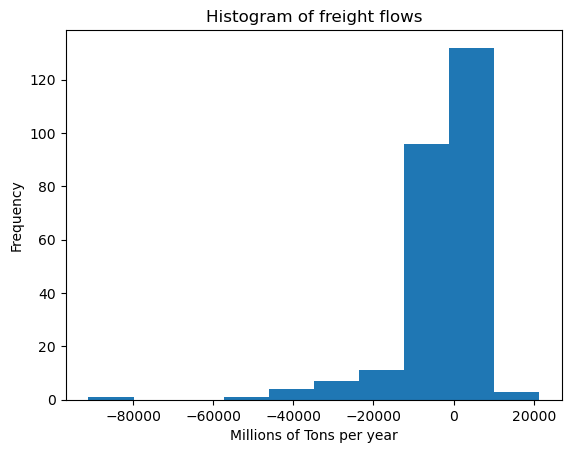

In [157]:
import matplotlib.pyplot as plt

import folium
import branca.colormap as cm
from IPython.display import display


min_lat=24.7433195
max_lat=49.3457868
min_lon=-124.7844079
max_lon=-66.9513812


m = folium.Map(
  max_bounds=True,
  location=[42, -95],
  zoom_start=4,
  min_zoom=4,
  tiles='OpenStreetMap',
  # max_lat=max_lat,
  # min_lon=min_lon,
  # max_lon=max_lon,
  # min_lat=min_lat
)

m.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]])
wmax = fzn.fafZoneLinksDf['flows'].max()
wmin = fzn.fafZoneLinksDf['flows'].min()

def select_flows(feature):
  return feature['properties']['flows']

def norm_w(feature):
  return (select_flows(feature) - wmin)/(wmax-wmin)

def norm_abs_fn(feature):
  value = select_flows(feature)
  return value/(wmax if value > 0 else -wmin)

lineWeightMax = 4
lineWeightMin = 0.75

if True:
  zoneDf = fzn.fafZonesDf.copy()
  zoneDf.geometry = zoneDf.geometry.simplify(.15)
  zoneDf[['FAF_Zone_1', 'geometry']].explore(
    m=m,
    column='FAF_Zone_1',
    cmap='Greens',
    legend=False,
    style_kwds={'opacity':.1}
  )

if False: 
  from folium import DivIcon
  for i, r in fzn.fafZoneLinksDf.iterrows():
    center = r.geometry.centroid
    folium.map.Marker(
      [center.y, center.x],
      icon=DivIcon(
          icon_size=(20,150),
          icon_anchor=(0,0),
          html='<div style="font-size: 12px">%s</div>' % round(r.flows,4),
        )
    ).add_to(m)


  for i, r in fzn.fafZoneNodesDf.iterrows():
    center = r.geometry.centroid
    folium.map.Marker(
      [center.y, center.x],
      icon=DivIcon(
          icon_size=(20,150),
          icon_anchor=(0,0),
          html='<div style="font-size: 16px; font-weight: bold">%s</div>' % int(i),
        )
    ).add_to(m)


fzn.fafZoneLinksDf[['FAF_Zone_1_fr', 'FAF_Zone_1_to', 'flows', 'geometry']].explore(
  m=m,
  column='flows',
  style_kwds={
    'style_function': lambda feature: {
      'color': cm.linear.plasma(norm_w(feature)),
      'weight': norm_w(feature) * (lineWeightMax - lineWeightMin) + lineWeightMin
    } if MODE != 'compare' else {
      'color': cm.linear.RdYlGn_11(norm_abs_fn(feature) + .5),
      'weight': abs(norm_abs_fn(feature)) * 3 + 1,
      # 'yooo': print(abs(norm_abs_fn(feature)) if select_flows(feature) < 0 else False)
    }
  }
)

fzn.fafZoneNodesDf[['FAF_Zone_1', 'geometry']].explore(
  m=m,
  color='black'
)
display(m)
if MONTE_CARLO:
  fzn.fafZoneLinksDf['flow_df%'] = (fzn.fafZoneLinksDf['flow_df_percent'] * 100).round(2)
fzn.fafZoneLinksDf['flowr'] = fzn.fafZoneLinksDf['flows'].round()

display(fzn.fafZoneLinksDf.sort_values('flows', axis=0, ascending=False).reset_index()[
  ['FAF_Zone_1_fr', 'FAF_Zone_1_to', 'flowr'] + (['flow_df%', 'flow_covs', 'flow_df', ] if MONTE_CARLO else [])
].head(10))
fzn.fafZoneLinksDf['flows'].plot(
  kind='hist',
  title='Histogram of freight flows',
  xlabel='Millions of Tons per year'
)
plt.show()

if MONTE_CARLO:
  from matplotlib.ticker import PercentFormatter

  diff_percents = monte_railnet_flows.sub(railnet_flows, axis=0).abs().div(railnet_flows, axis=0).mul(100, axis=0)
  plot = diff_percents.T.expanding().mean().abs().mean(axis=1).plot(
    title='Monte Carlo Simulation Convergence',
    xlabel='Iterations',
    ylabel='Precent Error'
  )
  plot.yaxis.set_major_formatter(PercentFormatter())
  plt.show()
  avg_diff_percents = diff_percents.mean(axis=1)
  fzn.fafZoneLinksDf.loc[~np.isfinite(fzn.fafZoneLinksDf.flow_df_percent), 'flow_df_percent'] = 0
  plot = avg_diff_percents.plot(
    kind='hist',
    title='Histogram of flow errors in percent',
    xlabel='Percent Error'
  )
  mean_error = avg_diff_percents.mean()
  plt.axvline(mean_error, color='k')
  plot.xaxis.set_major_formatter(PercentFormatter())
  
  min_ylim, max_ylim = plt.ylim()
  plt.text(mean_error * 1.1, max_ylim*0.9, 'Mean: {:.4f}%'.format(mean_error))
  plt.show()

In [158]:
fzn.fafZoneLinksDf.sample(3)

geometry  \
FAF_Zone_fr FAF_Zone_to                                                      
513         540          LINESTRING (-77.57529 38.70154, -81.02183 38.5...   
190         319          LINESTRING (-93.23168 42.01259, -99.17163 41.1...   
92          363          LINESTRING (-73.09981 41.37882, -73.79257 40.9...   

                         BRANCH  CNTYFIPS  COUNTRY  DIVISION  FRAARCID  \
FAF_Zone_fr FAF_Zone_to                                                  
513         540               2         2        2         2         2   
190         319               1         1        1         1         1   
92          363               2         2        2         2         2   

                         FRADISTRCT  FRFRANODE  KM  MILES  ...  \
FAF_Zone_fr FAF_Zone_to                                    ...   
513         540                   2          2   2      2  ...   
190         319                   1          1   1      1  ...   
92          363                   2          2   2      2  ...   

                                                            CFS12_NAME_to  \
FAF_Zone_fr FAF_Zone_to                                                     
513         540                                Remainder of West Virginia   
190         319                                     Remainder of Nebraska   
92          363          New York-Newark, NY-NJ-CT-PA  CFS Area (NY Part)   

                                                            CFS17_NA_1_to  \
FAF_Zone_fr FAF_Zone_to                                                     
513         540                                Remainder of West Virginia   
190         319                                     Remainder of Nebraska   
92          363          New York-Newark, NY-NJ-CT-PA  CFS Area (NY Part)   

                                          FAF_Zone_D_to  \
FAF_Zone_fr FAF_Zone_to                                   
513         540                           West Virginia   
190         319                              Rest of NE   
92          363          New York NY-NJ-CT-PA (NY Part)   

                                                            FAF_Zone_1_to  \
FAF_Zone_fr FAF_Zone_to                                                     
513         540                                             West Virginia   
190         319                                     Remainder of Nebraska   
92          363          New York-Newark, NY-NJ-CT-PA  CFS Area (NY Part)   

                              distance  distance_norm  n_tracks_norm  \
FAF_Zone_fr FAF_Zone_to                                                
513         540          384024.649929       0.690163       0.977273   
190         319          674880.508793       0.437379       1.000000   
92          363          102843.558336       0.934538       0.977273   

                           weight    flows    flowr  
FAF_Zone_fr FAF_Zone_to                              
513         540          1.667436   -180.0   -180.0  
190         319          1.437379 -42452.0 -42452.0  
92          363          1.911811  -1417.0  -1417.0  

[3 rows x 83 columns]

In [159]:
seg = (91,92)
y1 = railnet_flows[seg]
y2 = compare_flows[seg]
display(round(((railnet_flows[seg] - compare_flows[seg]) / railnet_flows[seg]) * 100, 2))


np.float64(18.18)